In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv(r"C:\Users\VICTUS\Downloads\housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
correlation_matrix = data.corr(numeric_only=True)

correlation_matrix


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [5]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

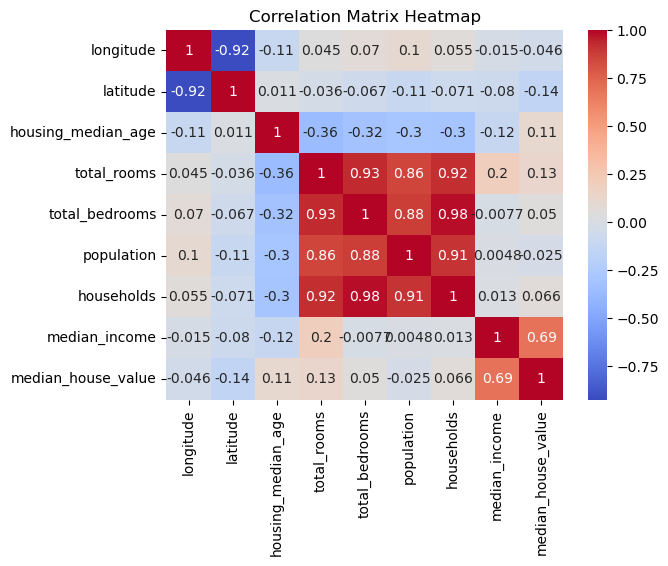

In [6]:
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm')

plt.title("Correlation Matrix Heatmap")

plt.show()


In [7]:
import numpy as np

high_corr = np.where(correlation_matrix > 0.8)

for i, j in zip(*high_corr):
    if i != j:
        print(correlation_matrix.index[i], 
              "-", 
              correlation_matrix.columns[j], 
              ":", 
              correlation_matrix.iloc[i, j])


total_rooms - total_bedrooms : 0.9303795046865031
total_rooms - population : 0.8571259728659829
total_rooms - households : 0.9184844926543111
total_bedrooms - total_rooms : 0.9303795046865031
total_bedrooms - population : 0.8777467431529311
total_bedrooms - households : 0.9797282708045709
population - total_rooms : 0.8571259728659829
population - total_bedrooms : 0.8777467431529311
population - households : 0.9072222660959659
households - total_rooms : 0.9184844926543111
households - total_bedrooms : 0.9797282708045709
households - population : 0.9072222660959659


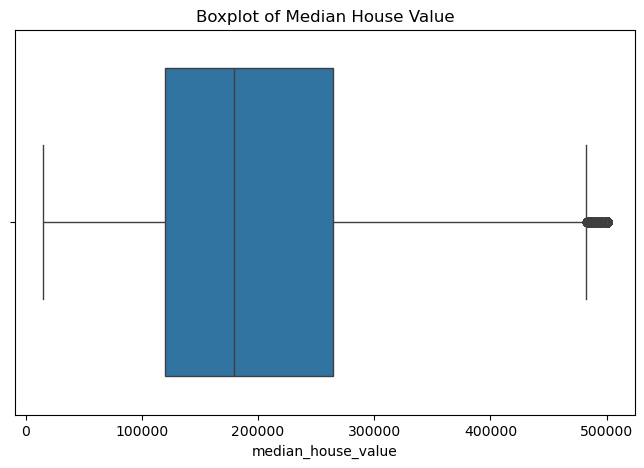

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['median_house_value'])
plt.title("Boxplot of Median House Value")
plt.show()


## Observations

1. The correlation heatmap shows that total_rooms and total_bedrooms 
   have a very high positive correlation (>0.8), indicating multicollinearity.

2. Population and households also show strong correlation.

3. The boxplot of median_house_value shows presence of outliers 
   at the higher end of the distribution.

Conclusion:
Highly correlated variables may cause multicollinearity in ML models, 
and outliers may affect model performance.
